## Generalized Linear Model Assignment

#### Name : Kunal Chatur Salunkhe

 - M.Sc. Applied Statistics
 - Roll no. : 10 

# Contest

- Import Result of (Applied Statistics) 
 - Find the summary statistics
 - Check the null values
 - Line Plot for students Performance
 - Multiple Bar Plot for Marks and Anxiety Levels of Students
- Import the Data (M.Sc. Statistics)
 - Find the summary statistics
 - Check the null values
 - Line Plot for students Performance
 - Multiple Bar Plot for Marks and Anxiety Levels of Students
- Import the GLM Result Applied & Pure Statistics
 - Find the summary statistics
 - Line Plot for students Performance
 - Histogram
 - Shapiro-Wilk test for check the normality
 - K-S test for check the normality
 - Find the correlation between Marks & Time
 - Apply the Linear Regression
   - Calculate the Predicted Y
   - Calculate the Residual
   - Calculate the RMSE & MSE
 - Fit a multiple regression model (OLS)
 - Perform the t-test for "Marks_pure_stat" & "Marks_applied_stat"
 - Perform the t-test for Gender (x3) 
 - Apply Multinomial Logit Model
 - Calculate the Odds ratio of Gender (x3)
              

## Applied Statistics 

In [6]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

## Import the Data (M.Sc. Applied Statistics)

- GLM Result of Applied Statistics

In [7]:
applied = pd.read_excel("D:/M.SC 3sem 2023/GLM/Applied GLM.xlsx")
applied

,Roll Number,Name,Gender,Course,Marks in Total (GLM),Study Time(in Min),Anxiety Level(1-10)
0,1,Adinath Nathu Pangarkar.,Male,Applied Statistic,8.75,60,2
1,2,Aishwarya Hindurao Shejwal.,Female,Applied Statistic,6.75,360,6
2,3,Akshay Changdev Pawar.,Male,Applied Statistic,8.50,120,8
3,4,Anisa Ashapak Mulani.,Female,Applied Statistic,8.25,240,7
4,5,Apekshit Brahmadev Gaikwad.,Male,Applied Statistic,3.50,300,8
5,6,Ashutosh Pratap Lotake.,Male,Applied Statistic,5.00,60,5
6,7,Gaurav Nale.,Male,Applied Statistic,3.50,90,8
7,8,Hiralal Suresh Mali.,Male,Applied Statistic,11.25,120,5
8,9,Joel George.,Male,Applied Statistic,7.25,60,6
9,10,Kunal Salunkhe.,Male,Applied Statistic,7.00,360,7


### Check the null values

In [8]:
applied.isnull().sum()

Roll Number             0
Name                    0
Gender                  0
Course                  0
Marks in Total (GLM)    0
Study Time(in Min)      0
Anxiety Level(1-10)     0
dtype: int64

### Find the summary statistics

In [9]:
applied.describe()

,Roll Number,Marks in Total (GLM),Study Time(in Min),Anxiety Level(1-10)
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,7.562500,159.750000,5.300000
std,5.91608,2.577579,135.999952,2.386365
min,1.00000,3.500000,30.000000,1.000000
25%,5.75000,6.375000,60.000000,4.000000
50%,10.50000,7.375000,75.000000,5.500000
75%,15.25000,8.500000,303.750000,7.000000
max,20.00000,14.750000,400.000000,9.000000


Text(0.5, 1.0, 'Line Plot for Roll numberwise marks')

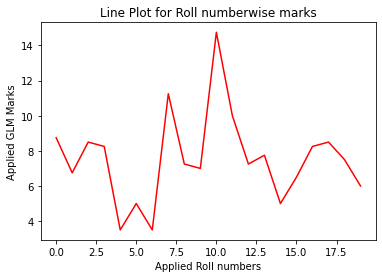

In [10]:
plt.plot(applied['Marks in Total (GLM)'], color = "red")
plt.xlabel("Applied Roll numbers")
plt.ylabel("Applied GLM Marks")
plt.title("Line Plot for Roll numberwise marks")

### Student Performance: 
- Each point on the line represents the marks obtained by an individual student. From those points, you can see how each student's marks vary. This plot can help identify outliers or students with exceptional performance.

## Multiple Bar Plot for Marks and Anxiety Levels of Students

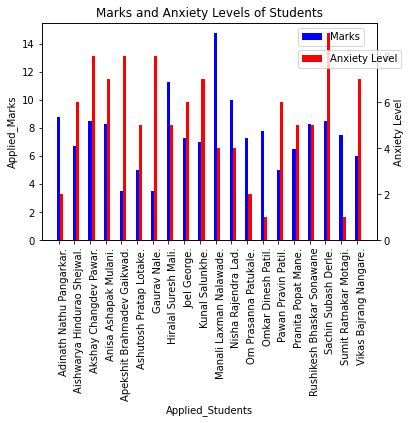

In [11]:
applied_marks = applied['Marks in Total (GLM)']
anxiety_levels = applied['Anxiety Level(1-10)']
students = applied['Name']

# Create a bar plot
width = 0.2  # Width of the bars
x = range(len(students))

fig, ax1 = plt.subplots()

#Here we create plot of applied_marks
ax1.bar(x, applied_marks, width, label='Marks', color='blue', align='center')
ax1.set_xlabel('Applied_Students')
ax1.set_ylabel('Applied_Marks')
ax1.set_xticks(x)
ax1.set_xticklabels(students, rotation=90, ha='left')


ax2 = ax1.twinx()

# Plot anxiety levels
ax2.bar([i + width for i in x], anxiety_levels, width, label='Anxiety Level', color='red', align='center')
ax2.set_ylabel('Anxiety Level')

ax1.legend(loc='upper left', bbox_to_anchor=(0.75, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))

plt.title('Marks and Anxiety Levels of Students')
plt.show()


### From Multiple Bar Plot
- From this plot we can see that each student marks compare to their anxiety level.
- Also identify students with high marks and high or low anxiety levels, and vice versa.
 - For eg : "Manali Laxman Nalawade" has highest marks & moderate anxiety level.

##  Import the Data (M.Sc. Statistics)

- GLM Result of Pure Statistics

In [12]:
Data = pd.read_excel("D:/M.SC 3sem 2023/GLM/Pure GLM.xlsx")
Data

,rollno,marks,course,x1,x2,X3,Unnamed: 6,Unnamed: 7,Unnamed: 8,# (1)comparision : independent two sample test,Unnamed: 10
0,1,8.75,statistics,70,7,Female,NaN,NaN,NaN,# (2)x1 number of hour of study ; predict mar...,NaN
1,2,9.00,statistics,150,3,Female,NaN,NaN,NaN,#x2 anxiety,NaN
2,3,7.50,statistics,50,6,Female,NaN,NaN,NaN,#(3) summary stat# all together mean variance ...,NaN
3,4,3.75,statistics,45,7,Male,NaN,NaN,NaN,"#histogram ,sterge rule k=3.233(logn) base 10,...",NaN
4,5,6.50,statistics,60,4,Male,NaN,NaN,NaN,# test of normality k.s.test and shapiro wilks...,NaN
5,6,9.25,statistics,100,4,Male,NaN,NaN,NaN,#(7) scatter plot,NaN
6,7,7.25,statistics,50,4,Male,NaN,NaN,NaN,# (8) simple partial and mutliple correlation ...,NaN
7,8,12.25,statistics,60,6,Female,NaN,NaN,NaN,"#(9) multiple regression ,R^2, adjR^2",NaN
8,9,12.00,statistics,20,6,Female,NaN,NaN,NaN,# (10) residual analysis ;(i) test of model ad...,NaN
9,10,6.00,statistics,120,5,Female,NaN,NaN,NaN,"# (11) final model : f-test ,t-test",NaN


In [13]:
Pure_stat = Data[['rollno','marks','course','x1','x2','X3']]
Pure_stat

,rollno,marks,course,x1,x2,X3
0,1,8.75,statistics,70,7,Female
1,2,9.00,statistics,150,3,Female
2,3,7.50,statistics,50,6,Female
3,4,3.75,statistics,45,7,Male
4,5,6.50,statistics,60,4,Male
5,6,9.25,statistics,100,4,Male
6,7,7.25,statistics,50,4,Male
7,8,12.25,statistics,60,6,Female
8,9,12.00,statistics,20,6,Female
9,10,6.00,statistics,120,5,Female


In [14]:
Pure_stat.describe()

,rollno,marks,x1,x2
count,22.000000,22.000000,22.000000,22.000000
mean,11.500000,7.681818,74.090909,4.636364
std,6.493587,2.542709,37.149517,1.216766
min,1.000000,3.750000,20.000000,3.000000
25%,6.250000,6.062500,51.250000,4.000000
50%,11.500000,7.375000,60.000000,4.000000
75%,16.750000,9.000000,97.500000,5.750000
max,22.000000,12.250000,150.000000,7.000000


Text(0.5, 1.0, 'Line Plot for Roll numberwise marks')

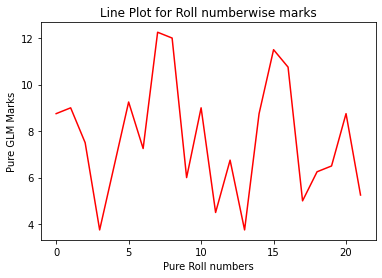

In [15]:
plt.plot(Pure_stat['marks'], color = "red")
plt.xlabel("Pure Roll numbers")
plt.ylabel("Pure GLM Marks")
plt.title("Line Plot for Roll numberwise marks")

### Student Performance: 
- Each point on the line represents the marks obtained by an individual student. From those points, you can see how each student's marks vary. This plot can help identify outliers or students with exceptional performance.

## Multiple Bar Plot for Marks and Anxiety Levels of Students

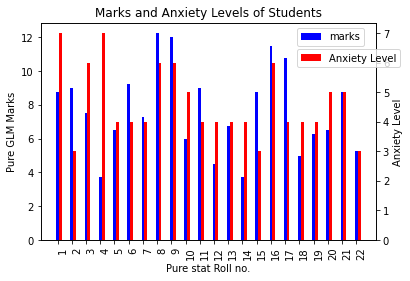

In [16]:
Pure_marks = Pure_stat['marks']
Pure_anxiety_levels = Pure_stat['x2']
students = Pure_stat['rollno']

# Create a bar plot
width = 0.2  # Width of the bars
x = range(len(students))

fig, ax1 = plt.subplots()

#Here we create plot of applied_marks
ax1.bar(x, Pure_marks, width, label='marks', color='blue', align='center')
ax1.set_xlabel('Pure stat Roll no.')
ax1.set_ylabel('Pure GLM Marks')
ax1.set_xticks(x)
ax1.set_xticklabels(students, rotation=90, ha='left')


ax2 = ax1.twinx()

# Plot anxiety levels
ax2.bar([i + width for i in x], Pure_anxiety_levels, width, label='Anxiety Level', color='red', align='center')
ax2.set_ylabel('Anxiety Level')

ax1.legend(loc='upper left', bbox_to_anchor=(0.75, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))

plt.title('Marks and Anxiety Levels of Students')
plt.show()


### From Multiple Bar Plot
- From this plot we can see that each student marks compare to their anxiety level.
- Also identify students with high marks and high or low anxiety levels, and vice versa.
 - For eg : Roll no. 4 has low marks & high anxiety level

## Import the GLM Result Applied & Pure Statistics 

- Independent variable : course , x1 = "time", x2 = "Anxiety Level", x3 = "Gender"
 - course : Pure Statistics = 1 & Applied Statistics = 0
 - x3 = Gender  : Male = 1  & Female = 0

- Dependent variable : Marks

In [17]:
##Male = 1 & # Female = 0
GLM_result = pd.read_excel("D:/M.SC 3sem 2023/GLM/GLM result.xlsx")
GLM_result

,Marks,course,x1,x2,x3
0,8.75,1,70,7,0
1,9.00,1,150,3,0
2,7.50,1,50,6,0
3,3.75,1,45,7,1
4,6.50,1,60,4,1
5,9.25,1,100,4,1
6,7.25,1,50,4,1
7,12.25,1,60,6,0
8,12.00,1,20,6,0
9,6.00,1,120,5,0


### Find the summary statistics

In [18]:
GLM_result.describe()

,Marks,course,x1,x2,x3
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.625000,0.523810,114.880952,4.952381,0.619048
std,2.528647,0.505487,105.607927,1.873465,0.491507
min,3.500000,0.000000,20.000000,1.000000,0.000000
25%,6.062500,0.000000,60.000000,4.000000,0.000000
50%,7.375000,1.000000,60.000000,5.000000,1.000000
75%,8.750000,1.000000,120.000000,6.000000,1.000000
max,14.750000,1.000000,400.000000,9.000000,1.000000


Text(0.5, 1.0, 'Line Plot for Roll numberwise marks')

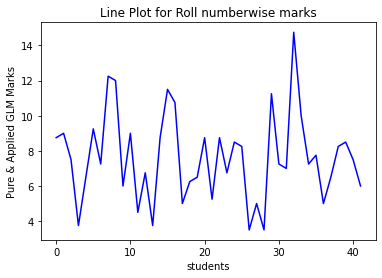

In [19]:
plt.plot(GLM_result['Marks'], color = "blue")
plt.xlabel("students")
plt.ylabel("Pure & Applied GLM Marks")
plt.title("Line Plot for Roll numberwise marks")

### Student Performance: 
- Each point on the line represents the marks obtained by an individual student. From those points, you can see how each student's marks vary. This plot can help identify outliers or students with exceptional performance.

## Histogram

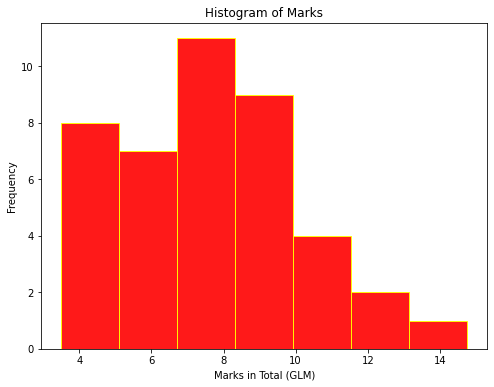

In [20]:
Both_marks = GLM_result['Marks']

plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.hist(Both_marks, bins=7, edgecolor='yellow', alpha=0.9, color='red')
plt.xlabel('Marks in Total (GLM)')
plt.ylabel('Frequency')
plt.title('Histogram of Marks')

plt.show()


## Plot the Histogram using Sturge Rule : 
 
- n = 42
- Range (R) = 11.25
- k = 1+3.222 log(n) 
 - 1+3.222 log(42) = 6.230109
- Class Interval = R/k = 1.8057

- So we take bins = 7 (approx from k)

### From the Histogram :

- From the histogram, We can say that our dependent(Marks) variable show the normal (bell shaped) pattern.

### We'll perform the Shapiro-Wilk test for check the normality 

In [21]:
from scipy import stats

## perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(GLM_result['Marks'])
print("p_value :",p_value)

### set the significance level (alpha)
alpha = 0.05

### check the p-value against the significance level
if p_value > alpha:
    print("Sample appears to be normally distributed (fail to reject H0)")
else:
    print("Sample does not appear to be normally distributed (reject H0)")


p_value : 0.276019424200058
Sample appears to be normally distributed (fail to reject H0)


### Find the correlation between Marks & Time 

In [22]:
### Find the correlation 

from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation_coefficient, p_value = pearsonr(GLM_result['Marks'],GLM_result['x1'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson Correlation Coefficient: 0.1658278994289421
p-value: 0.2939281374382552


### Result & Interpretation :
- The correlation coefficient = 0.1658278994289421, the correlation is relatively weak & value is close to zero we can say that there is a positive relationship.
- From the p-value = 0.2939281374382552 is greater than the commonly used significance level of 0.05, So we accept the null hypothesis.

In [23]:
x = GLM_result[['course', 'x1', 'x2', 'x3']]
y = GLM_result['Marks']

#### Split the data 
### We apply the Linear Regression 

In [24]:
## We split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0,  train_size = 33, test_size = 9)

## We apply the Linear Regression 
lr = LinearRegression(fit_intercept = True)
lreg = lr.fit(x_train,y_train)

print("R-Square :",lreg.score(x_train,y_train))

R-Square : 0.2330715354441164


### Calculate the Predicted Y

In [25]:
## calculate the Y_Predicted 

y_pred = lr.predict(x_test)
y_pred

array([ 8.03535144,  8.03535144,  8.10437784,  6.4656565 ,  8.94352228,
       10.13445337,  7.79405281,  6.4656565 , 10.89198106])

### Calculate the Residual 

In [26]:
### calculate the residual
resid = y_test - y_pred
resid

30   -0.785351
36   -3.035351
27   -3.104378
4     0.034344
10    0.056478
25   -1.884453
28   -4.294053
11   -1.965656
37   -4.391981
Name: Marks, dtype: float64

### We'll calculate the RMSE & MSE 

In [27]:
## RMSE
RMSE = np.sqrt(np.mean(resid*resid))
print("RMSE :",RMSE)

## Calculate the MSE 
MSE = np.mean((y_pred - y_test)**2)
print("MSE :",MSE)

RMSE : 2.67944901801981
MSE : 7.179447040167324


## Fit a multiple regression model (OLS)

In [28]:
import statsmodels.api as sm

### Fit a multiple regression model

x2 = sm.add_constant(x)  ## add a constant (intercept) term

model = sm.OLS(y, x2).fit()

print(model.summary())

#### multiple correlation coefficient (R-squared)
multiple_corr = model.rsquared

print("multiple Correlation (Mark vs. course, x1= time, x2= anxiety, and x3= gender):", multiple_corr)


                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.740
Date:                Tue, 10 Oct 2023   Prob (F-statistic):             0.0430
Time:                        23:37:26   Log-Likelihood:                -92.603
No. Observations:                  42   AIC:                             195.2
Df Residuals:                      37   BIC:                             203.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2435      1.503      6.815      0.0

### Result & Interpretation :

- 1) R-squared: 0.229
 - R-squared: 0.229 that is 22% of the variance in dependent variable is explained by the model.
- 2) Adj. R-squared: 0.145
 - Adj. R-squared: 0.145 i.e.Explaine about 15% of the variability.
- 3) AIC = 195.2
 - An AIC value of 195 suggests that the model has relatively good fit to the data while considering the complexity. 
- 4) BIC = 203.9
 - A BIC value of 203.9 suggests that the model is relatively good in terms of fitting the data.
- 5) Kurtosis = 2.249
 - The Kurtosis value is less than 3 but greater then 0, we conclude that the distribution heavier-tailed than normal distibution, but not extremely so.
- 6) Durbin-Watson = 1.988
 - it's close to the value of 2, which indicates that the residuals are independent and there is no systematic pattern of correlation between consecutive residuals.
- 7) Prob(JB) = 0.470
 - Prob(JB) value of 0.470 greater than 0.05(alpha).So we conclude that, we accept the null hypothesis (H0), suggesting that there is no strong evidence to indicate that the residuals significantly from the normal distribution. 
- 8) Cond. No. = 733
 - from Condition number, there is a high degree of multicollinearity among the independent variables.

### Interpretation :  P - value
 -  cource, x1= time, x2 = Anxiety Level  those P-values are greater than 0.05, So we accept H0. i.e. there is no significance difference.
 -  x3 = Gender ; P-value is less than 0.05, So we reject H0. i.e. there is significance difference.
 

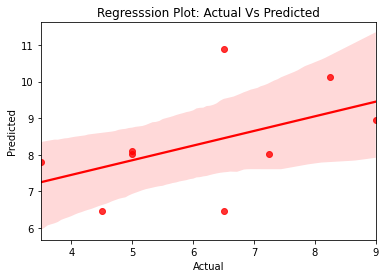

In [29]:
sns.regplot(x = y_test, y = y_pred, color = "red")
plt.ylabel("Predicted")
plt.xlabel("Actual")

plt.title("Regresssion Plot: Actual Vs Predicted")
plt.show()

## Perform the t-test for "Marks_pure_stat" &  "Marks_applied_stat"

In [30]:
marks_pure_stat = GLM_result[GLM_result['course'] == 1]['Marks']  ### Pure Statistics = 1 

marks_applied_stat = GLM_result[GLM_result['course'] == 0]['Marks']  ### Applied Statistics = 0

t_statistic, p_value = stats.ttest_ind(marks_pure_stat, marks_applied_stat )
print('P_value :',p_value)

### Here we set the significance level
alpha = 0.05

#### We'll check the p-value against the significance level
if p_value < alpha:
    print("There is a significant relationship between 'marks_pure_stat' and 'marks_applied_stat'.")
else:
    print("There is no significant relationship between 'marks_pure_stat' and 'marks_applied_stat'.")

P_value : 0.8808150695031178
There is no significant relationship between 'marks_pure_stat' and 'marks_applied_stat'.


### Result & Interpretation : 
 -   5% level of significance (alpha) = 0.05
 -   P_value : 0.8808150695031178

- Here p-value is (0.8808150695031178) greater than the alpha (p-value > alpha), So we conclude that, we accept the null hypothesis (H0) at 5% level of significance. 
 -  So we can say that, there is no significant relationship between 'Marks_pure_stat' and 'Marks_applied_stat'. 

###  Perform the t-test for Gender (x3)

In [31]:
marks_male = GLM_result[GLM_result['x3'] == 1]['Marks']  ### Male = 1 

marks_female = GLM_result[GLM_result['x3'] == 0]['Marks']  ### female = 0

t_statistic, p_value = stats.ttest_ind(marks_male, marks_female )
print('P_value :',p_value)

### Here we set the significance level
alpha = 0.05

#### We'll check the p-value against the significance level
if p_value < alpha:
    print("There is a significant relationship between 'marks_male' and 'marks_female'.")
else:
    print("There is no significant relationship between 'marks_male' and 'marks_female'.")

P_value : 0.003419197114342527
There is a significant relationship between 'marks_male' and 'marks_female'.


### Result & Interpretation : 
 -   5% level of significance (alpha) = 0.05
 -   P_value : 0.003419197114342527

- Here p-value is (0.003419197114342527) smaller than the alpha (p-value < alpha), So we conclude that, we reject the null hypothesis (H0) at 5% level of significance. 
 -  So we can say that, there is a significant relationship between 'Marks_male' and 'Marks_male'. 

In [32]:
GLM_result_Bin = pd.read_csv("D:/M.SC 3sem 2023/GLM/Binary Result GLM.csv")
GLM_result_Bin

,Marks,course,x1,x2,x3
0,1,1,70,7,0
1,1,1,150,3,0
2,0,1,50,6,0
3,0,1,45,7,1
4,0,1,60,4,1
5,1,1,100,4,1
6,0,1,50,4,1
7,1,1,60,6,0
8,1,1,20,6,0
9,0,1,120,5,0


## Import the data 

- dependent = Marks 
 - Pass_students (<= 8) = 1  
 - Fail_students (8<) = 0  
 
### We apply Multinomial Logit Model

In [33]:
X = GLM_result_Bin[['course', 'x1', 'x2', 'x3']]

X = sm.add_constant(X)
## independent variable 
Y = GLM_result_Bin['Marks']

# Fit the binary cumulative logit model
model = sm.MNLogit(Y, X)
result = model.fit()

# Get the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.631069
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                  Marks   No. Observations:                   42
Model:                        MNLogit   Df Residuals:                       37
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Oct 2023   Pseudo R-squ.:                 0.07591
Time:                        23:37:28   Log-Likelihood:                -26.505
converged:                       True   LL-Null:                       -28.682
Covariance Type:            nonrobust   LLR p-value:                    0.3602
   Marks=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2617      1.397      0.187      0.851      -2.477       3.000
course        -0.1266      0.

## Interpretation : 
- Here all P-values greater than 0.05, So we conclude that, we accept the null hypothesis (H0) at 5% level of significance. So we can say that, there is no significant difference.


### We calculate the Odds ratio of Gender (x3)

In [34]:
odds_ratios = np.exp(-1.3907)
odds_ratios
print("odds_ratios :", odds_ratios)

odds_ratios : 0.24890101292763933


### Result & Interpretation :
- odds ratio = 0.24890101292763933
 - odds ratio is 0.24890101292763933 (i.e. 25%), it indicates that for every one-unit increase in the x3 (Gender), it means that the odds of the dependent variable (Marks) happening decrease by approximately 75% 